In [59]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [60]:
def bin_smooth(x): # Only works for 1D I think.
    sum = 0
    smoothed_list = []
    for i in range(len(x)):
        sum = sum + x[i]
        if (i%4 == 3) or (i == len(x)-1):
            smoothed_list.append(sum/4)
            sum = 0
    return np.array(smoothed_list)

***Background***

In [61]:
# Data Sets
bg_counts = pd.read_csv('background.csv') # These two will be used for all data sets
bg_count2 = pd.read_csv('background_data_2024-04-24_15-09-50.csv')
bg_spectrum = pd.read_csv('Spectrum_background_data_2024-04-24_15-09-50.csv')

In [62]:
print(bg_spectrum)
print(bg_spectrum.to_numpy()[:,1:][-1])

        Timestamp    0    1    2    3    4    5    6    7    8  ...  1014  \
0    1.713997e+09  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   
1    1.713997e+09  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   
2    1.713997e+09  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   
3    1.713997e+09  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   
4    1.713997e+09  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   
..            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
148  1.713997e+09  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   
149  1.713997e+09  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   
150  1.713997e+09  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   
151  1.713997e+09  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   
152  1.713997e+09  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   

     1015  1016  1017  1018  1019  1020  1021  1022  1023  
0     1.0   1.0

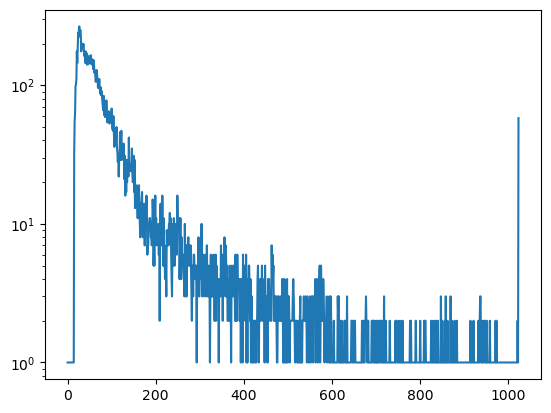

In [63]:
fig1, ax1 = plt.subplots()
ax1.plot(bg_spectrum.to_numpy()[:,1:][-1])
ax1.set_yscale('log')

***Sample 1 - Known - Fiesta Ware w/ Uraninum***

In [64]:
# Data Sets
FW_NS_spectrum = pd.read_csv('Spectrum_known_uranium_noshield_2024-04-24_15-19-34.csv').to_numpy()
FW_NS_geiger = pd.read_csv('known_uranium_noshield.csv').to_numpy()
FW_NS_D3Scount = pd.read_csv('known_uranium_noshield_2024-04-24_15-19-34.csv').to_numpy()
# print(FW_NS_spectrum[:,1:][-1])
# print(FW_NS_geiger[:,1])
# print(FW_NS_D3Scount[1:,3])

Text(0.5, 1.0, 'D3S Counts - Fiesta Ware, No Shielding')

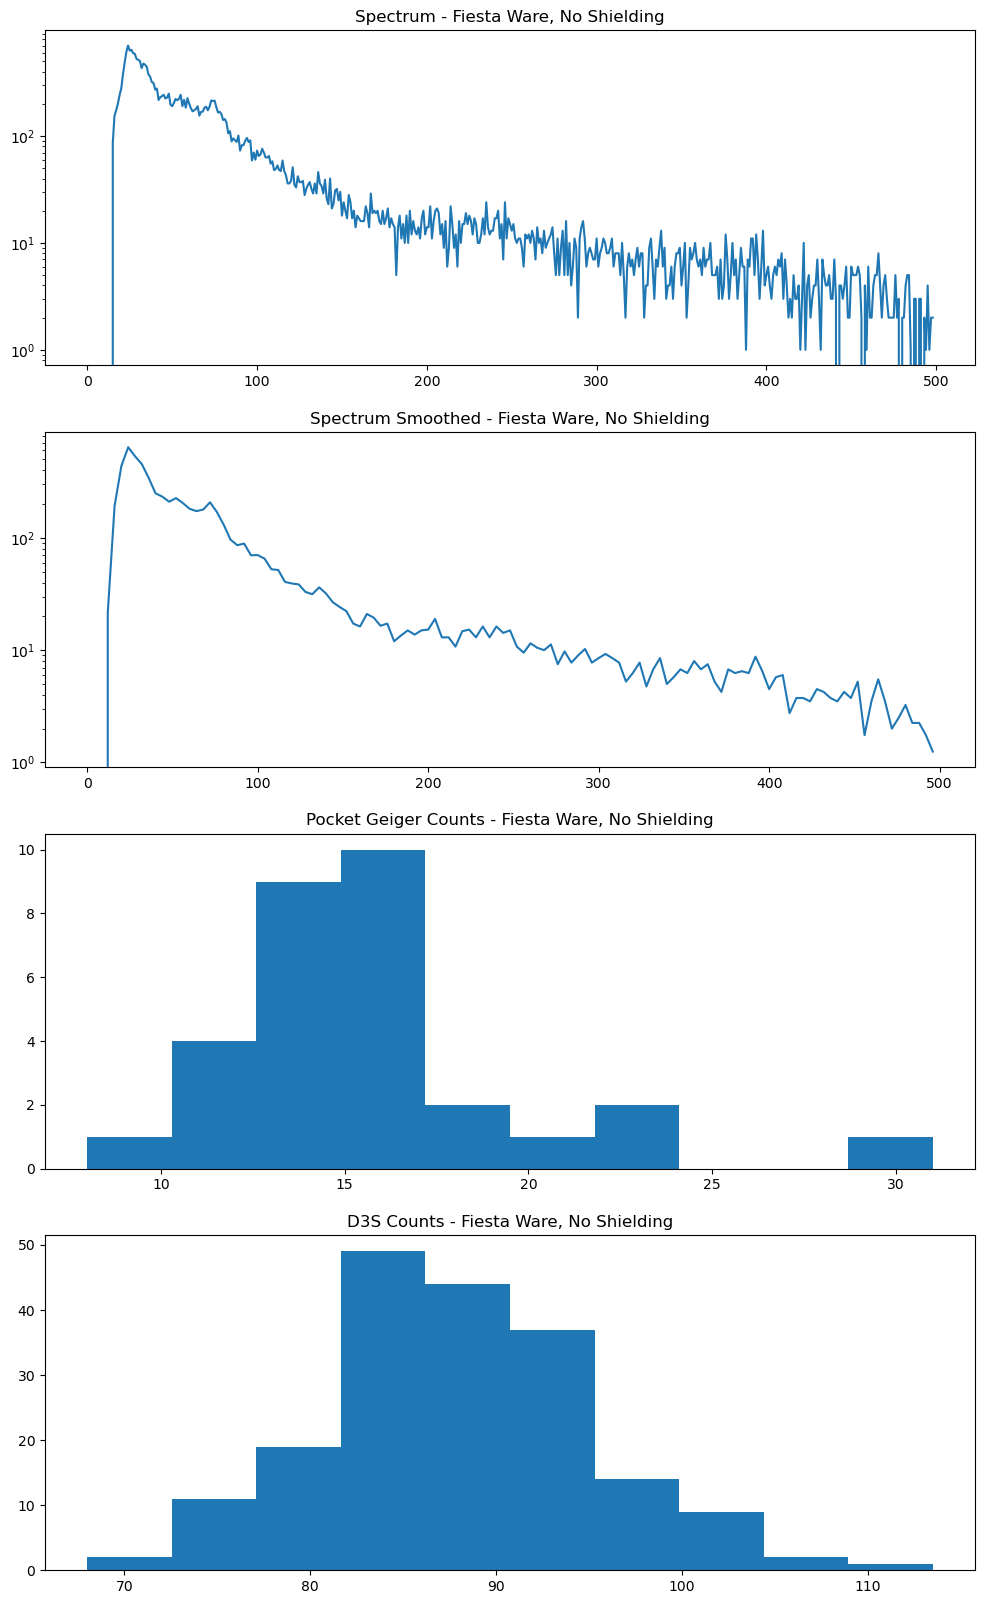

In [65]:
fig2, ax2 = plt.subplots(figsize=(12,20),nrows=4)
ax2[0].plot(FW_NS_spectrum[:,1:500][-1]-FW_NS_spectrum[:,1:500][0])
ax2[0].set_yscale('log')
ax2[0].set_title('Spectrum - Fiesta Ware, No Shielding')
FW_NS_spectrum_smooth = bin_smooth(FW_NS_spectrum[:,1:500][-1])
ax2[1].plot(np.arange(0,len(FW_NS_spectrum_smooth))*4, FW_NS_spectrum_smooth-bin_smooth(FW_NS_spectrum[:,1:500][0]))
ax2[1].set_yscale('log')
ax2[1].set_title('Spectrum Smoothed - Fiesta Ware, No Shielding')
ax2[2].hist(FW_NS_geiger[:,1])
ax2[2].set_title('Pocket Geiger Counts - Fiesta Ware, No Shielding')
ax2[3].hist(FW_NS_D3Scount[1:,3])
ax2[3].set_title('D3S Counts - Fiesta Ware, No Shielding')